# COVID_INSIGHTS

All this information is from 2018 and 2019, right before the Covid-19 pandemic started. We have several columns, but we have no specific target variable, so you should determine what could we possibly try to predict based on the rest of the features. Let's see if there is any relationship between them, and it seems reasonable to do some feature selection in this dataset, before entering any model.

## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('../data/interim/dataset.csv')

In [2]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [3]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

## Exploratory data analysis

**Analysing our 3 possible target variables**

Let's choose three possible target variables. In this solution proposal I have chosen the number of ICU Beds per county, the total number of Specialists in 2019, and the number of active physicians per 100,000 population in 2018.

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ICU Beds_x', ylabel='Density'>

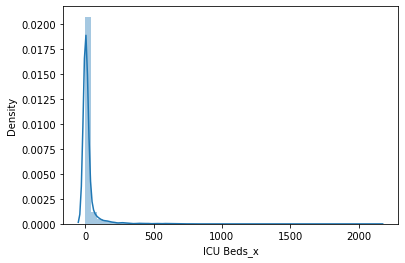

In [4]:
#Let's see the distribution of the data from ICU Beds per county

sns.distplot(df['ICU Beds_x'])

Observations: Number of ICU Beds have a very right skewed distribution. There are counties with more than 2000 beds but most of the counties have less than 100. We suspect it may be because of the county size and population.

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Specialist Physicians (2019)', ylabel='Density'>

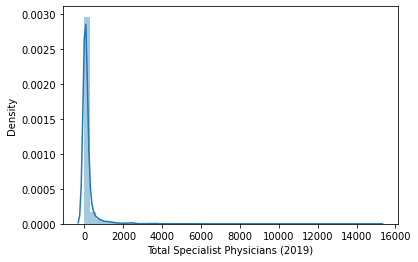

In [5]:
#Let's see the distribution of the data from total Specialist Physicians in 2019

sns.distplot(df['Total Specialist Physicians (2019)'])

Observations: The total number of sepcialists in 2019 had a very right skewed distribution too. There are counties with more than 15000 specialists but most of the counties have less than 1000. 

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Active Physicians per 100000 Population 2018 (AAMC)', ylabel='Density'>

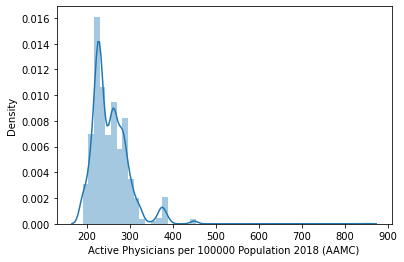

In [6]:
#Let's see the distribution of the data from Active Physicians per 100000 population in 2018

sns.distplot(df['Active Physicians per 100000 Population 2018 (AAMC)'])

Observations: We can say that most of the counties have between 200 and 300 active physicians per 100,000 population. Some fewer counties have up to 450 active physicians, and the counties having more than 460 are considered outliers (according to this visualization). Howeverthey seem to be oultiers with valuable information. Let's dive deeper in the outliers.

**Looking for outliers**

In [7]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,1

In [8]:
#creating a function to visualize outliers

def outliers(feature): 
    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1)
    sns.boxplot(df[feature])

    plt.subplot(1,2,2)
    sns.histplot(df[feature], bins = 5)

    plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


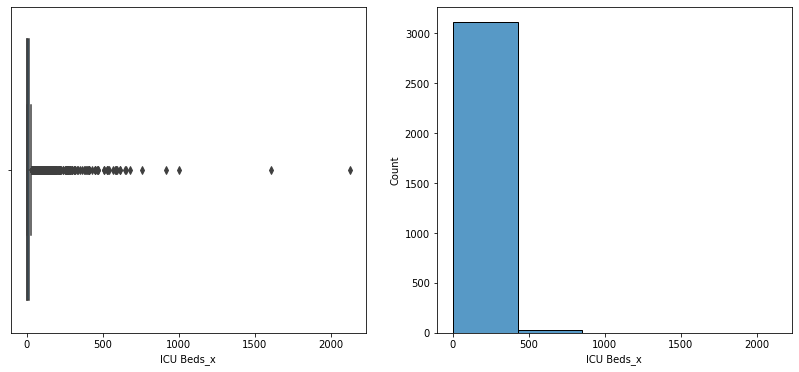

In [9]:
#Look for outliers  in ICU Beds feature
outliers('ICU Beds_x')

We can see that it's actually only one county that has more than 2000 ICU beds, one that has more than 1500 ICU beds, one that has more than 1000 ICU Beds. The rest has less than 1000, with a mayority of counties having less than 500.

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


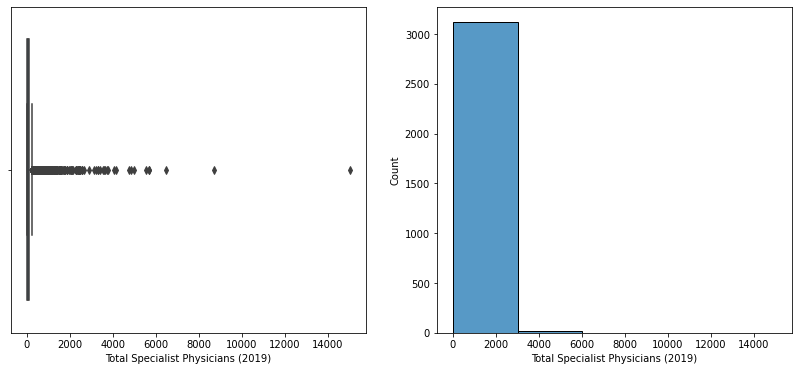

In [10]:
outliers('Total Specialist Physicians (2019)')

We see that it's only one county that had more than 15,000 specialists in 2019, only two counties having more than 6000 specialists. Most of the counties have between 0 and 2500 specialists.

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


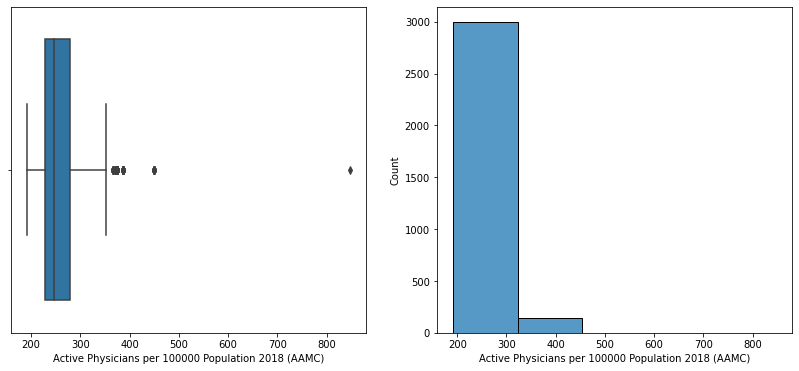

In [11]:
outliers('Active Physicians per 100000 Population 2018 (AAMC)')

This is a much clear graph. We can notice that most of the counties have between 230 and 380 active physicians approximately. 1 county has more than 850 active physicians per 100,000 population.

**Relationship between the total population and the number of ICU beds, and total population vs total number of specialists per county**

<AxesSubplot:xlabel='TOT_POP', ylabel='Total Specialist Physicians (2019)'>

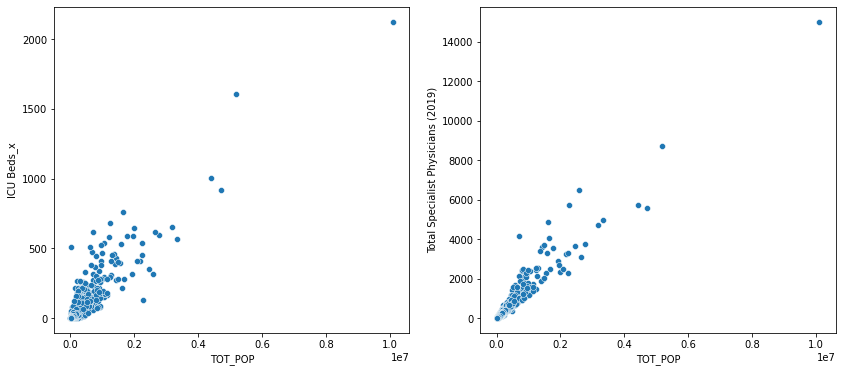

In [12]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='TOT_POP', y='ICU Beds_x')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='TOT_POP', y='Total Specialist Physicians (2019)')

Outliers are not letting us have a better visualization of the data points of mayority of counties, so we will only consider counties with less than 700 ICU beds for visualizations, and also we will take a samll sample of 200 counties.

<AxesSubplot:xlabel='TOT_POP', ylabel='Total Specialist Physicians (2019)'>

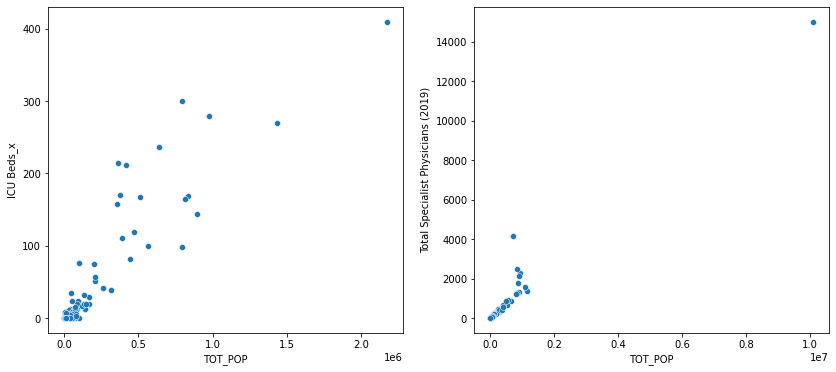

In [13]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df.sample(200), x='TOT_POP', y='ICU Beds_x')

plt.subplot(1,2,2)
sns.scatterplot(data=df.sample(200), x='TOT_POP', y='Total Specialist Physicians (2019)')

**Looking for correlations between population with a bachelor's degree or higher and the number of ICU beds, and bachelor's degree or higher vs total number of specialists**

<AxesSubplot:xlabel="Bachelor's degree or higher 2014-18", ylabel='Total Specialist Physicians (2019)'>

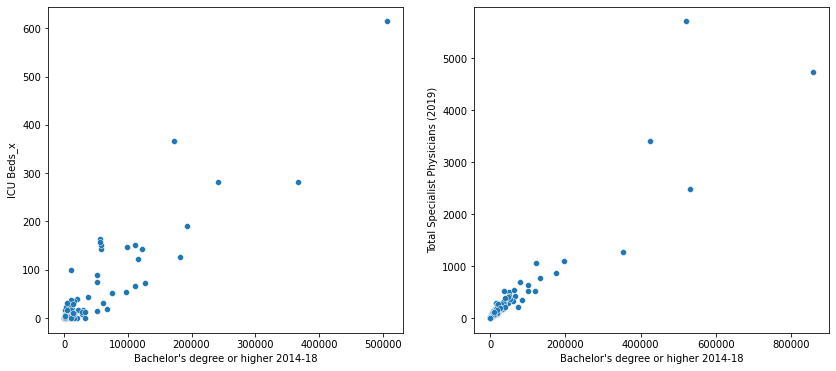

In [14]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df.sample(200), x="Bachelor's degree or higher 2014-18", y='ICU Beds_x')

plt.subplot(1,2,2)
sns.scatterplot(data=df.sample(200), x="Bachelor's degree or higher 2014-18", y='Total Specialist Physicians (2019)')


**Looking for correlations between the population older than 60 years old and the number of ICU beds, and the population older than 60 years old vs the total number of specialists**

<AxesSubplot:xlabel='Population Aged 60+', ylabel='Total Specialist Physicians (2019)'>

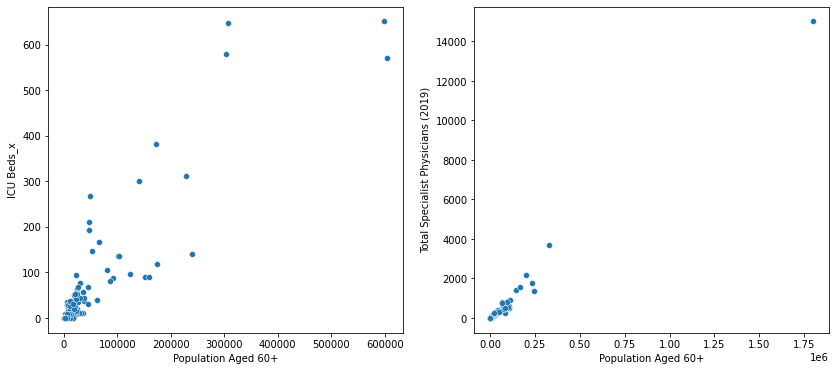

In [15]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df.sample(200), x="Population Aged 60+", y='ICU Beds_x')

plt.subplot(1,2,2)
sns.scatterplot(data=df.sample(200), x="Population Aged 60+", y='Total Specialist Physicians (2019)')

**Looking for correlations between the employed population and the number of ICU beds, and the employed population vs total number of specialists**

<AxesSubplot:xlabel='Employed_2018', ylabel='Total Specialist Physicians (2019)'>

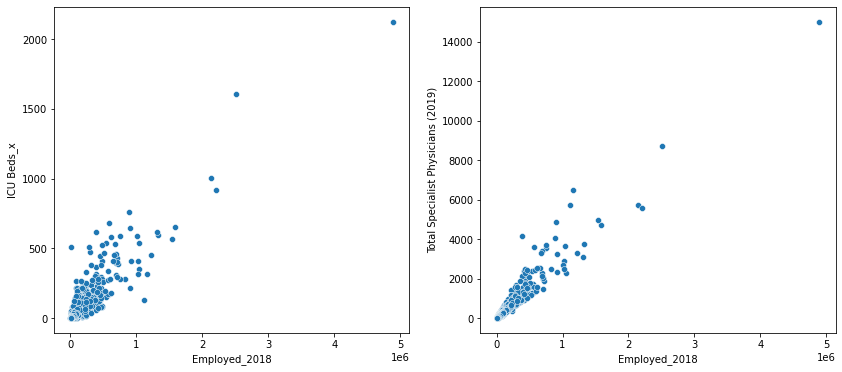

In [16]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x="Employed_2018", y='ICU Beds_x')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="Employed_2018", y='Total Specialist Physicians (2019)')

**Looking for correlations between the prevalence of COPD and the number of ICU beds in a county**

<AxesSubplot:xlabel='COPD_number', ylabel='Total Specialist Physicians (2019)'>

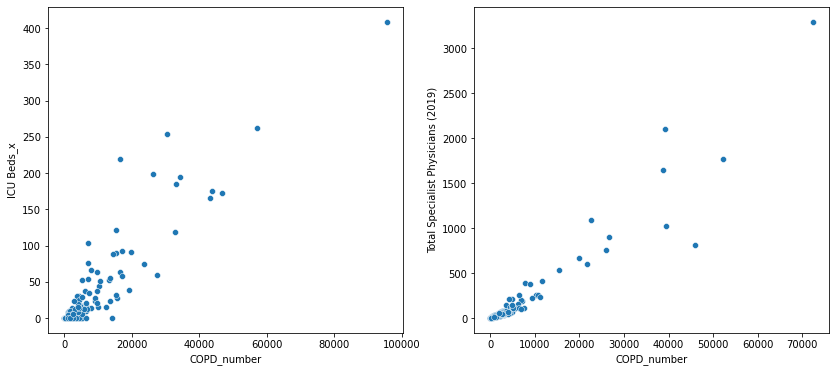

In [17]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df.sample(200), x="COPD_number", y='ICU Beds_x')

plt.subplot(1,2,2)
sns.scatterplot(data=df.sample(200), x="COPD_number", y='Total Specialist Physicians (2019)')

**Looking for correlations between the prevalence of CKD and the number of ICU beds in a county**

<AxesSubplot:xlabel='COPD_number', ylabel='Count'>

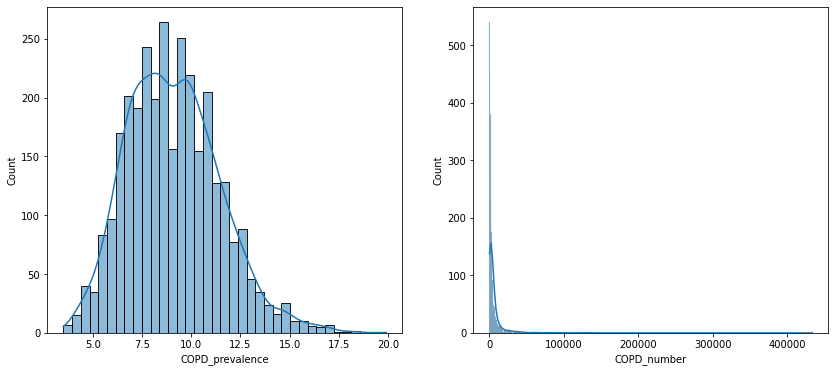

In [18]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x="COPD_prevalence", kde=True)

plt.subplot(1,2,2)
sns.histplot(data=df, x="COPD_number", kde=True)

(0.0, 7.467090790828246)

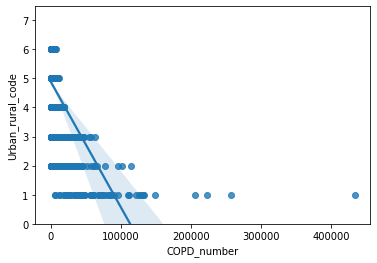

In [19]:
sns.regplot(x = "COPD_number", y = "Urban_rural_code", data = df)
plt.ylim(0,)


(0.0, 7.631169690856598)

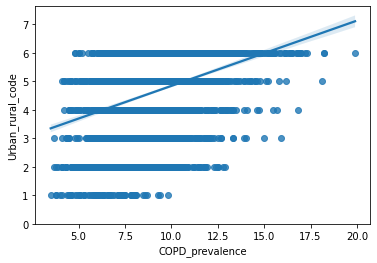

In [20]:
sns.regplot(x = "COPD_prevalence", y = "Urban_rural_code", data = df)
plt.ylim(0,)

**Let's see some correlations between features we consider might impact in those two targets**

In [21]:
df_corr = df[['TOT_POP','Percent of Population Aged 60+','R_death_2018',"Percent of adults with a bachelor's degree or higher 2014-18",
              'Unemployment_rate_2018','COPD_prevalence','Urban_rural_code','ICU Beds_x','Total Specialist Physicians (2019)']]


In [22]:
df_corr.head()

,TOT_POP,Percent of Population Aged 60+,R_death_2018,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,COPD_prevalence,Urban_rural_code,ICU Beds_x,Total Specialist Physicians (2019)
0,55601,19.1,9.6,27.7,3.6,8.6,3,6,72.142154
1,218022,26.3,10.3,31.3,3.6,8.6,4,51,282.882982
2,24881,23.5,12.9,12.2,5.2,12.1,6,5,32.283033
3,22400,21.1,11.4,11.5,4.0,10.0,2,0,29.063942
4,57840,23.6,11.4,12.6,3.5,10.5,2,6,75.047251


In [23]:
df_corr['ICU Beds_x'] = df_corr['ICU Beds_x']/df_corr['TOT_POP']
df_corr.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_18496\1926012954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['ICU Beds_x'] = df_corr['ICU Beds_x']/df_corr['TOT_POP']


,TOT_POP,Percent of Population Aged 60+,R_death_2018,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,COPD_prevalence,Urban_rural_code,ICU Beds_x,Total Specialist Physicians (2019)
0,55601,19.1,9.6,27.7,3.6,8.6,3,0.000108,72.142154
1,218022,26.3,10.3,31.3,3.6,8.6,4,0.000234,282.882982
2,24881,23.5,12.9,12.2,5.2,12.1,6,0.000201,32.283033
3,22400,21.1,11.4,11.5,4.0,10.0,2,0.000000,29.063942
4,57840,23.6,11.4,12.6,3.5,10.5,2,0.000104,75.047251


In [24]:
df_corr = df_corr.drop('TOT_POP',axis=1)
df_corr.head()

,Percent of Population Aged 60+,R_death_2018,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,COPD_prevalence,Urban_rural_code,ICU Beds_x,Total Specialist Physicians (2019)
0,19.1,9.6,27.7,3.6,8.6,3,0.000108,72.142154
1,26.3,10.3,31.3,3.6,8.6,4,0.000234,282.882982
2,23.5,12.9,12.2,5.2,12.1,6,0.000201,32.283033
3,21.1,11.4,11.5,4.0,10.0,2,0.000000,29.063942
4,23.6,11.4,12.6,3.5,10.5,2,0.000104,75.047251


In [25]:
df_corr.rename(columns = {'Percent of Population Aged 60+':'% of Population Aged 60+', "Percent of adults with a bachelor's degree or higher 2014-18":"% bachelor's degree or higher 2014-18"}, inplace = True)

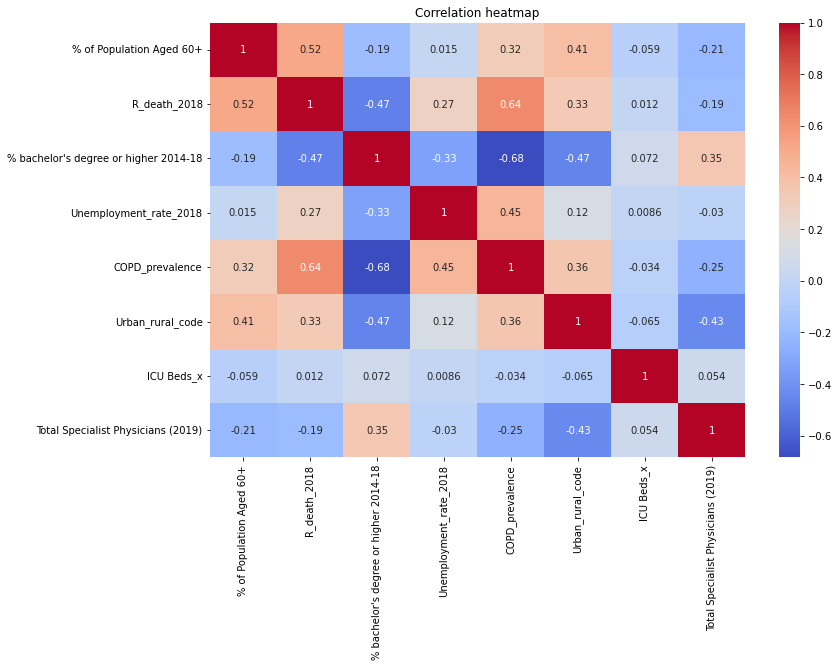

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.savefig('heatmap.png')

In [27]:
df_corr2 = df[['Population Aged 60+',"Bachelor's degree or higher 2014-18",
              'Unemployed_2018','COPD_number']]

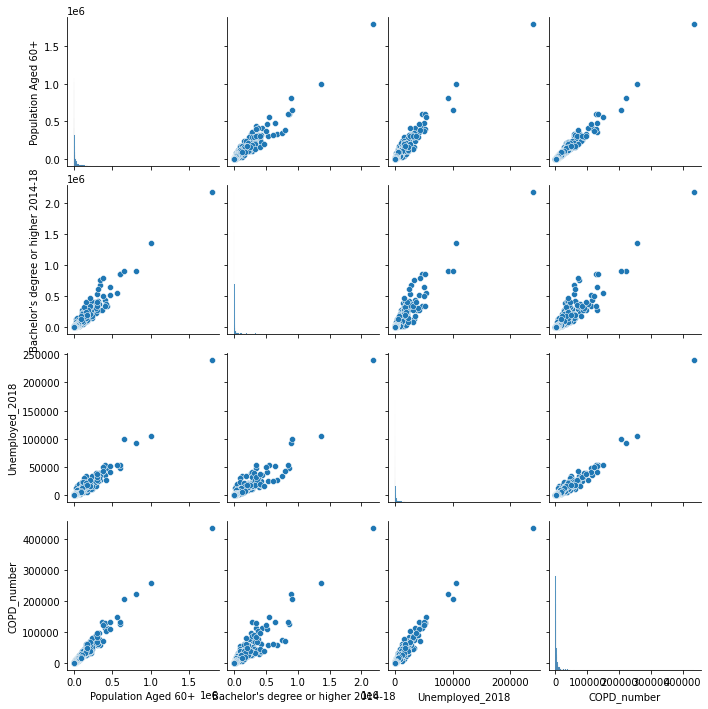

In [28]:
sns.pairplot(data=df_corr2)
plt.savefig('pairplot.png')

**Obtain the feature matrix**

In [29]:
#First, we will create a dataframe with the COUNTY AND STATE name for each of the fips code

names_df = df[['fips', 'COUNTY_NAME', 'STATE_NAME']]

In [30]:
#This will be our dataframe of target variables

outcomes = df[['ICU Beds_x','Total Specialist Physicians (2019)']]

In [31]:
# This will be our dataframe of possible predictors, before we select specific features

pd.options.display.max_rows = 200
df.dtypes
df.drop(['CNTY_FIPS','fips','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)','Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)','Total physician assistants (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','STATE_NAME','COUNTY_NAME','ICU Beds_x','Total Specialist Physicians (2019)'], axis=1, inplace=True)

## Modeling

In [32]:
import pandas as pd
from numpy import arange

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold



In [33]:
#define predictor and response variables
X = df
y1 = outcomes['ICU Beds_x']
y2=  outcomes['Total Specialist Physicians (2019)']

**Method for first outcome: ICU Beds_x**

In [34]:
#define train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=42)

In [35]:
#Using a pipeline to dynamically standardize the data that goes into our model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline1 = make_pipeline(StandardScaler(), Lasso(alpha=2))
pipeline1.fit(X_train, y_train)
print(pipeline1[1].coef_, pipeline1[1].intercept_)

[ 0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.          0.
 -0.1439942   0.         -0.          0.         -0.          0.
  0.          0.         -0.         14.16331327  0.          0.
 -0.          0.         -0.         -0.         -0.          0.
  0.          0.         -0.         16.41315767  0.3703261   0.
  0.         -0.         -0.         -0.          0.          0.
  0.         13.9258527  -0.         -0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.66991273  0.          0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         44.27209948 -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.        ] 24.63011828

In [36]:
coef_list=pipeline1[1].coef_

In [37]:
loc=[i for i, e in enumerate(coef_list) if e != 0]

In [38]:
loc

[12, 21, 33, 34, 43, 54, 81]

In [39]:
col_name=df.columns

In [40]:
col_name[loc]

Index(['50-59 y/o % of total pop', 'Black-alone pop', 'GQ_ESTIMATES_2018',
       'R_birth_2018', 'Bachelor's degree or higher 2014-18', 'CI90UBINC_2018',
       'COPD_number'],
      dtype='object')

**Method for second outcome: Total Specialist Physicians (2019)**

In [41]:
#define train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=42)

In [42]:
#Using a pipeline to dynamically standardize the data that goes into our model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline2 = make_pipeline(StandardScaler(), Lasso(alpha=10))
pipeline2.fit(X_train, y_train)
print(pipeline2[1].coef_, pipeline2[1].intercept_)

[  0.           0.           0.           0.           0.
   0.          -0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          -0.         120.04288235   0.           0.
   0.          40.02489302  -0.           0.           0.
   0.           0.          -0.27317371  -0.           0.
  -0.           0.         -14.04127763  86.12477588   0.
  -0.           0.           0.          -0.          -0.
   0.          93.85150917   0.         206.93200178   0.
   0.          -0.           0.           0.          -0.
  -0.          -0.           0.           5.91635079   0.
   0.           0.          40.02458628   0.           0.
   0.           0.           0.          -0.           0.
   0.          -0.          -0.          -0.           0.
  -0.          -0.          -0.           0.          -0.
  -0.          -0.           0.           0.          -0.
   0.           0.          -0.          -0.          -0.
   0.         

In [43]:
coef_list_2=pipeline2[1].coef_

In [44]:
loc_2=[i for i, e in enumerate(coef_list_2) if e != 0]

In [45]:
loc_2

[17, 21, 27, 32, 33, 41, 43, 53, 57]

In [46]:
col_name[loc_2]

Index(['80+', 'Black-alone pop', 'Hawaiian/Pacific Islander-alone pop',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
       'High school diploma only 2014-18',
       'Bachelor's degree or higher 2014-18', 'CI90LBINC_2018',
       'Unemployed_2018'],
      dtype='object')

**Variable Selection**

In [47]:
list_final=[]
list_final.extend(loc)
list_final.extend(loc_2)

In [48]:
print(list_final)

[12, 21, 33, 34, 43, 54, 81, 17, 21, 27, 32, 33, 41, 43, 53, 57]


In [49]:
my_IV=list(set(list_final))

In [50]:
col_name[my_IV]

Index(['N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018',
       'High school diploma only 2014-18',
       'Bachelor's degree or higher 2014-18', '50-59 y/o % of total pop',
       'COPD_number', '80+', 'Black-alone pop', 'CI90UBINC_2018',
       'CI90LBINC_2018', 'Unemployed_2018',
       'Hawaiian/Pacific Islander-alone pop'],
      dtype='object')

Source : 

https://www.statology.org/lasso-regression-in-python/

https://vitalflux.com/lasso-ridge-regression-explained-with-python-example/#:~:text=In%20Python%2C%20Lasso%20regression%20can%20be%20performed%20using,therefore%20fewer%20features%20being%20used%20in%20the%20model.

https://machinelearningcompass.com/machine_learning_models/lasso_regression/